{'exec_type': '1', 'rate': ' 2', 'avg_lat': ' 0.03'}
{'exec_type': '1', 'rate': ' 4', 'avg_lat': ' 0.11'}
{'exec_type': '1', 'rate': ' 6', 'avg_lat': ' 0.25'}
{'exec_type': '1', 'rate': ' 8', 'avg_lat': ' 0.56'}
{'exec_type': '1', 'rate': '12', 'avg_lat': ' 1.16'}
{'exec_type': '2', 'rate': ' 1', 'avg_lat': ' 0.03'}
{'exec_type': '2', 'rate': ' 2', 'avg_lat': ' 0.11'}
{'exec_type': '2', 'rate': ' 4', 'avg_lat': ' 0.30'}
{'exec_type': '2', 'rate': ' 6', 'avg_lat': ' 0.59'}
{'exec_type': '2', 'rate': ' 8', 'avg_lat': ' 1.18'}
{'exec_type': '3', 'rate': ' 8', 'avg_lat': ' 0.03'}
{'exec_type': '3', 'rate': '16', 'avg_lat': ' 0.04'}
{'exec_type': '3', 'rate': '24', 'avg_lat': ' 0.04'}
{'exec_type': '3', 'rate': '32', 'avg_lat': ' 0.05'}
{'exec_type': '3', 'rate': '40', 'avg_lat': ' 0.06'}
{'exec_type': '3', 'rate': '48', 'avg_lat': ' 0.09'}
{'exec_type': '3', 'rate': '56', 'avg_lat': ' 0.37'}
{'exec_type': '3', 'rate': '64', 'avg_lat': ' 0.55'}
{'exec_type': '3', 'rate': '72', 'avg_lat': ' 

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

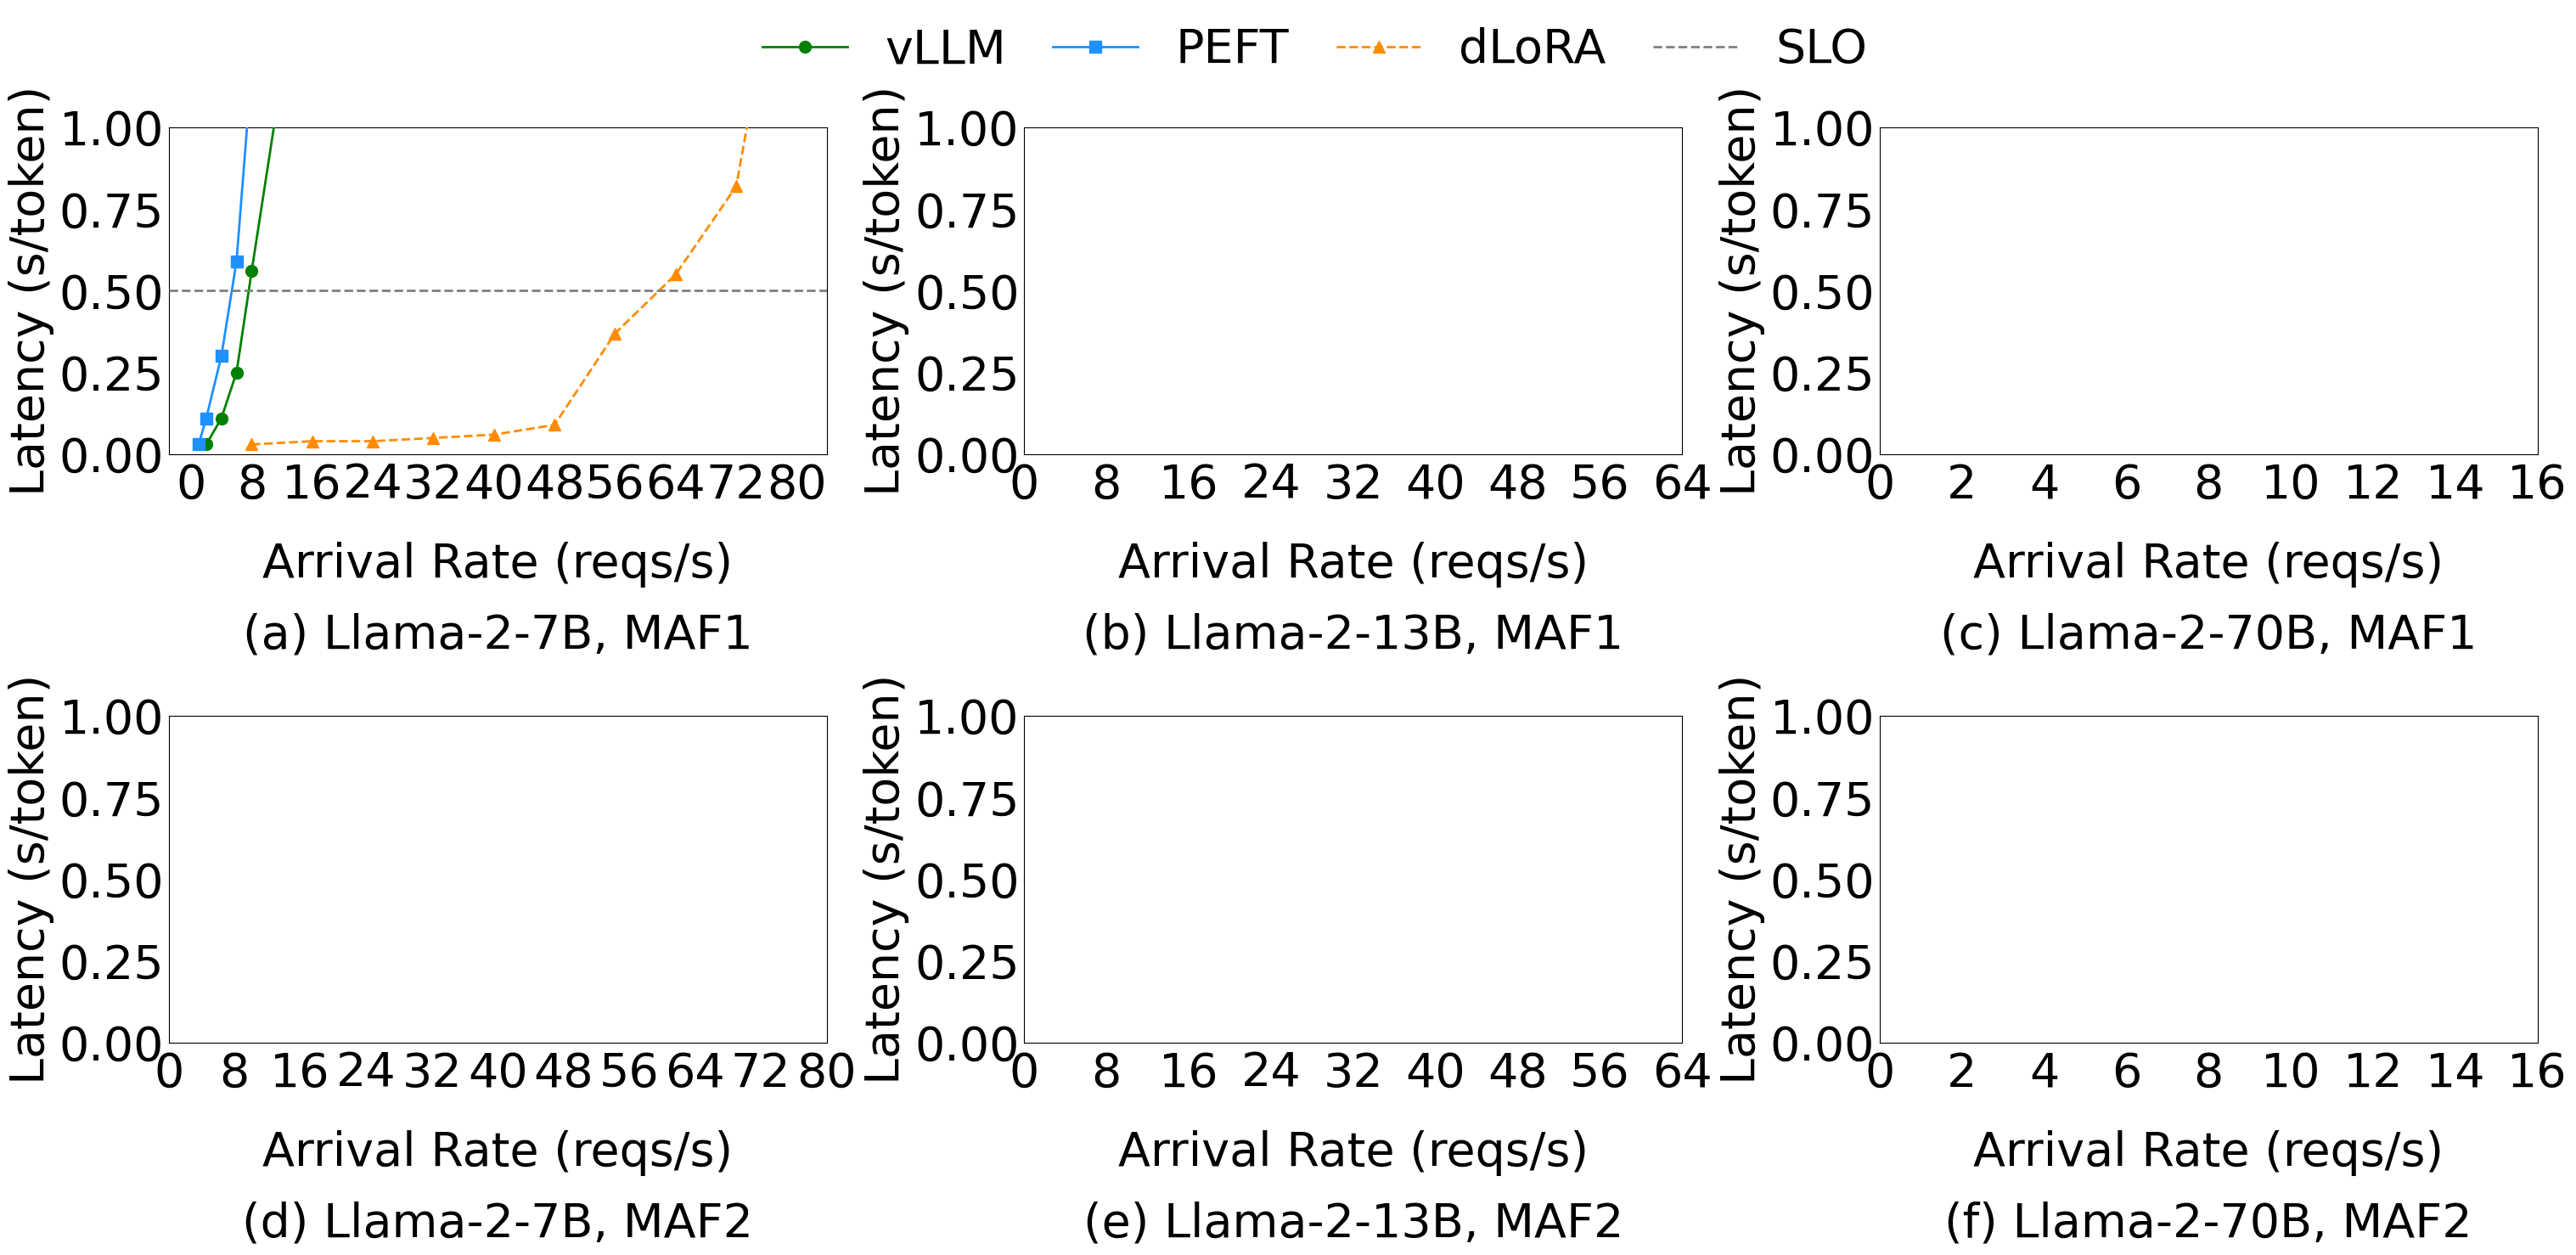

In [2]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

# constants
num_curves = 3
num_subfigs = 6
num_rows = 2
num_cols = 3

trace_type_list = ("maf1", "maf2")
model_type_list = ("7b", "13b", "70b")
exec_type_dict = {
    "1": "vLLM",
    "2": "PEFT",
    "3": "dLoRA"
}

slo = 0.5
rate_dict = {}
latency_dict = {}

for trace_type in trace_type_list:
    rate_dict[trace_type] = {}
    latency_dict[trace_type] = {}

    for model_type in model_type_list:
        rate_dict[trace_type][model_type] = {"vLLM": [], "PEFT": [], "dLoRA": []}
        latency_dict[trace_type][model_type] = {"vLLM": [], "PEFT": [], "dLoRA": []}

        file_path = f"./fig9_{trace_type}_{model_type}.csv"
        with open(file_path, 'r') as csvfile:
            reader = csv.DictReader(csvfile)

            for row in reader:
                print(row)
                exec_type = exec_type_dict[row["exec_type"]]
                arrival_rate = float(row["rate"])
                latency = float(row["avg_lat"])

                rate_dict[trace_type][model_type][exec_type].append(arrival_rate)
                latency_dict[trace_type][model_type][exec_type].append(latency)

# Set font and figure size
font_size = 40
plt.rc('font',**{'size': font_size})
plt.rc('pdf',fonttype = 42)

fig_size = (36, 14)
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = True
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.8)

# settings
colors = {0: 'green', 1: 'dodgerblue', 2: 'darkorange'}
labels = {0: 'vLLM',  1: 'PEFT', 2: 'dLoRA'}
markers = {0: 'o', 1: 's', 2: '^'}
linestyles = {0: 'solid', 1: 'solid', 2: '--'}

# x-axis setting
x_labels = {0: 'Arrival Rate (reqs/s)\n(a) Llama-2-7B, MAF1', 1: 'Arrival Rate (reqs/s)\n(b) Llama-2-13B, MAF1', 2: 'Arrival Rate (reqs/s)\n(c) Llama-2-70B, MAF1', 3: 'Arrival Rate (reqs/s)\n(d) Llama-2-7B, MAF2', 4: 'Arrival Rate (reqs/s)\n(e) Llama-2-13B, MAF2', 5: 'Arrival Rate (reqs/s)\n(f) Llama-2-70B, MAF2'}
x_ticks = {0: [i for i in range(0, 88, 8)], 3: [i for i in range(0, 88, 8)], 1: [i for i in range(0, 72, 8)], 4: [i for i in range(0, 72, 8)], 2: [i for i in range(0, 18, 2)], 5: [i for i in range(0, 18, 2)]}

# y-axis setting
y_label = 'Latency (s/token)'
y_ticks = [0, 0.25, 0.5, 0.75, 1]

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        axes[i][j].set_xlabel(x_labels[idx], labelpad=28, linespacing=1.7)
        axes[i][j].set_xticks(x_ticks[idx])
        # axes.set_xticklabels(x_ticklabels)
        axes[i][j].get_xaxis().set_tick_params(direction='in', pad=7)
        axes[i][j].get_xaxis().set_tick_params(which='minor', direction='in')

for i in range(num_rows):
    for j in range(num_cols):
        axes[i][j].set_ylim(bottom=0, top=1)
        axes[i][j].set_ylabel(y_label)
        axes[i][j].set_yticks(y_ticks)
        axes[i][j].yaxis.set_ticks_position('left')
        axes[i][j].tick_params(bottom=False, top=False, left=False, right=False)
        axes[i][j].minorticks_off()
        axes[i][j].get_yaxis().set_tick_params(direction='in', pad=4)
        axes[i][j].get_yaxis().set_tick_params(which='minor', direction='in')

# Plot bars
for i, trace_type in enumerate(trace_type_list):
    for j, model_type in enumerate(model_type_list):
        idx = i * num_cols + j
        lines = [[] for i in range(num_curves * 1)]

        for id_str, exec_type in exec_type_dict.items():
            k = int(id_str) - 1
            lines[k], = axes[i][j].plot(
                rate_dict[trace_type][model_type][exec_type],
                latency_dict[trace_type][model_type][exec_type],
                label=labels[k],
                marker = markers[k],
                color=colors[k],
                lw=2,
                markersize=10,
                linestyle=linestyles[k],
                zorder=3
            )
        
        slo_line = axes[i][j].axhline(y=slo, color='grey', label='SLO', linestyle='--', linewidth=2, zorder=3)


fig.legend(handles=[lines[0], lines[1], lines[2], slo_line], handlelength=1.8, 
           ncol=num_curves+1, loc='upper center', bbox_to_anchor=(0.5, 1.0), frameon=False, prop={'size':font_size}, columnspacing = 1)

file_path = './figure9.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)